# Data challenge URP

This competition is about predicting if a student are not going to be able to pay his/her tuition.
The university wanted to idenfified this kind of students to help them.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 200)
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.metrics import f1_score
import gc
import math

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from data import data_utils

In [5]:
# I am using fastai libraries to cloean and process the data

In [6]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [7]:
# loading the dataframes

In [8]:
train = pd.read_csv('data_train.csv',encoding='ISO-8859-1')
test = pd.read_csv('data_test.csv',encoding='ISO-8859-1')
train.shape, test.shape

C:\Users\JOHN\Anaconda3\envs\taco\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (76,77,78,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\JOHN\Anaconda3\envs\taco\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


((256215, 126), (44072, 116))

In [9]:
train.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,PORC_ASISTENCIA,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,VIVIENDA_DONDE_VIVE,TIPO_VIVIENDA_DONDE_VIVE,VIVE_CON,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,SEXO,HIJOS,CDEPA_DESCRIPCION,CPROV_DESCRIPCION,CDIST_DESCRIPCION,EDAD_ANIO_ACTUAL,ESTADO_CIVIL,TIPO_COLEGIO,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA,SITUACION_DEUDA_BOLETA_1,SITUACION_DEUDA_BOLETA_2,SITUACION_DEUDA_BOLETA_3,SITUACION_DEUDA_BOLETA_4,SITUACION_DEUDA_BOLETA_5,SITUACION_DEUDA_BOLETA_6,SITUACION_DEUDA_BOLETA_7,SITUACION_DEUDA_BOLETA_8,SITUACION_DEUDA_BOLETA_9,SITUACION_DEUDA_BOLETA_10
0,URP000001,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,0.0,8.3529,17.0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,18,0,56.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0,0,0,0,0,0,0,0,0,0
1,URP000002,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,18,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0,1,0,0,0,0,1,0,0,0
2,URP000003,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,19,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,Turismo;Hoteleria y Gastronomia,1.

In [10]:
test.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,PORC_ASISTENCIA,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,VIVIENDA_DONDE_VIVE,TIPO_VIVIENDA_DONDE_VIVE,VIVE_CON,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,SEXO,HIJOS,CDEPA_DESCRIPCION,CPROV_DESCRIPCION,CDIST_DESCRIPCION,EDAD_ANIO_ACTUAL,ESTADO_CIVIL,TIPO_COLEGIO,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA
0,URP000021,20181,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,28,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
1,URP000022,20182,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,28,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
2,URP000058,20181,REGULAR CICLO I,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,29,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,Lima,Lima,La Molina,30,Soltero(a),ESTATAL,15.33,12.175,20081,20121,10,6,0.0,123.0,40.0,83.0,8.183,20081,1,10,6,0,13,Contabilidad y Finanzas,6,4,0,20081.0,20121.0,NO EGRESO,SIN BECA
3,URP000059,20182,REGULAR CICLO II,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,29,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,Li

In [11]:
test.describe()

,SEMESTRE,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,HIJOS,EDAD_ANIO_ACTUAL,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL
count,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.0,44072.0,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.0,44072.0,44072.000000,44072.000000,43734.000000,44072.000000,2.171900e+04,21438.000000,2.143000e+04,2.156000e+04,21564.000000,23579.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.000000,44072.00000,43930.000000,43930.000000
mean,20181.502995,0.540116,2.387843,0.535896,0.081049,8.114347,1.793225,0.235217,6.473206,9.662915,0.479874,0.472681,0.473952,0.357438,0.279565,0.273235,0.255446,0.229602,0.226085,0.197087,0.189758,0.022078,0.013977,0.006943,0.006943,1.208148,1.238530,1.218007,1.012412,0.960122,0.940359,0.843461,0.807156,0.813011,0.701443,0.147259,0.100132,0.076375,0.076375,0.106666,0.107029,0.086631,0.070793,0.047536,0.037280,0.024823,0.027500,0.018969,0.007942,0.000363,0.000363,0.0,0.0,0.289878,0.295857,0.311706,0.262967,0.171038,0.149539,0.093801,0.098316,0.083545,0.032402,0.002246,0.001929,0.0,0.0,23.020830,0.011300,31.536402,0.128494,4.683212e+03,0.030786,3.829445e+02,1.285684e+05,0.357448,0.006955,24.020013,7.6217

In [12]:
test.shape

(44072, 116)

In [13]:
train.shape

(256215, 126)

In [18]:
len(list(set(train.columns).difference(test.columns))) #there are 10 more columns in the train data

10

In [15]:
list(set(train.columns).difference(test.columns))

['SITUACION_DEUDA_BOLETA_7',
 'SITUACION_DEUDA_BOLETA_1',
 'SITUACION_DEUDA_BOLETA_5',
 'SITUACION_DEUDA_BOLETA_6',
 'SITUACION_DEUDA_BOLETA_9',
 'SITUACION_DEUDA_BOLETA_4',
 'SITUACION_DEUDA_BOLETA_2',
 'SITUACION_DEUDA_BOLETA_8',
 'SITUACION_DEUDA_BOLETA_10',
 'SITUACION_DEUDA_BOLETA_3']

In [16]:
train[list(set(train.columns).difference(test.columns))].describe()

,SITUACION_DEUDA_BOLETA_7,SITUACION_DEUDA_BOLETA_1,SITUACION_DEUDA_BOLETA_5,SITUACION_DEUDA_BOLETA_6,SITUACION_DEUDA_BOLETA_9,SITUACION_DEUDA_BOLETA_4,SITUACION_DEUDA_BOLETA_2,SITUACION_DEUDA_BOLETA_8,SITUACION_DEUDA_BOLETA_10,SITUACION_DEUDA_BOLETA_3
count,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000
mean,0.226134,0.000113,0.001503,0.001124,0.206358,0.001858,0.002268,0.240806,0.170478,0.002318
std,0.418328,0.010638,0.038735,0.033508,0.404691,0.043062,0.047566,0.427573,0.376053,0.048094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the competition we needed to create a target based on these 10 features 'SITUACION_DEUDA_BOLETA_1...SITUACION_DEUDA_BOLETA_2'
These features are binary (0,1), in the case of one student, if one of these features was 1, so this student would be categorized as possible debtor. 

In [19]:
train['target']=train[list(set(train.columns).difference(test.columns))].sum(axis=1)/10
train['target']=train['target'].map(lambda x:math.ceil(x))

In [20]:
features=list(set(train.columns).difference(test.columns))
features.remove('target')

In [21]:
train.drop(features,axis=1,inplace=True) # after creatinng the target we don't still need these features 

In [22]:
train.shape

(256215, 117)

In [24]:
test.shape # so now, the train data just have one additional column (target)

(44072, 116)

In [25]:
list(set(train.columns).difference(test.columns))

['target']

In [26]:
train.describe()

,SEMESTRE,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,HIJOS,EDAD_ANIO_ACTUAL,PROM_COLEGIO,PUNTAJE_INGRESO,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,target
count,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.0,256215.0,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.0,256215.0,256215.000000,256215.000000,255404.000000,256215.000000,5.795800e+04,56066.000000,5.604500e+04,5.614200e+04,56158.000000,65521.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256215.000000,256213.000000,256213.000000,256215.000000,256215.000000,256213.000000,256213.000000,256213.000000,255790.000000,255790.000000,256215.000000
mean,20140.158867,0.655652,2.877989,0.783490,0.099093,9.682286,2.760174,0.297479,7.573588,12.368201,0.371739,0.891603,0.687025,0.500970,0.378967,0.323939,0.263579,0.222087,0.190328,0.149004,0.128240,0.011939,0.007459,0.002716,0.002716,2.656837,2.092600,1.715688,1.388867,1.146939,0.972039,0.816834,0.684125,0.608181,0.467080,0.076116,0.054872,0.029881,0.029881,0.253510,0.181879,0.112979,0.079023,0.059891,0.039237,0.023855,0.018145,0.010175,0.004547,0.000105,0.000144,0.0,0.0,0.840977,0.600012,0.414792,0.307712,0.223552,0.154230,0.091224,0.065184,0.044517,0.017064,0.000531,0.000379,0.0,0.0,20.935933,0.008864,37.426011,0.067377,2.402684e+03,0.033122,4.377054e+02,2.139480e+05,0.355

In [27]:
data_utils.show_missing(train)

,Missing Ratio
VIVIENDA_DONDE_VIVE,89.237945
TIPO_VIVIENDA_DONDE_VIVE,89.237945
INGRESO_PROPIO,78.125793
TRABAJA,78.117597
INGRESO_NETO_FAMILIARES,78.087934
AUTOS,78.081689
VIVE_CON,77.489218
NRO_HERMANOS,77.379154
HIJOS,74.427336
ESTADO_CIVIL,20.706828


In [28]:
test.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,PORC_ASISTENCIA,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,VIVIENDA_DONDE_VIVE,TIPO_VIVIENDA_DONDE_VIVE,VIVE_CON,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,SEXO,HIJOS,CDEPA_DESCRIPCION,CPROV_DESCRIPCION,CDIST_DESCRIPCION,EDAD_ANIO_ACTUAL,ESTADO_CIVIL,TIPO_COLEGIO,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA
0,URP000021,20181,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,28,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
1,URP000022,20182,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,28,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
2,URP000058,20181,REGULAR CICLO I,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,29,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,Lima,Lima,La Molina,30,Soltero(a),ESTATAL,15.33,12.175,20081,20121,10,6,0.0,123.0,40.0,83.0,8.183,20081,1,10,6,0,13,Contabilidad y Finanzas,6,4,0,20081.0,20121.0,NO EGRESO,SIN BECA
3,URP000059,20182,REGULAR CICLO II,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,29,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,Li

## Pre processing and Feature engineering

In [29]:
# I am splitting the student code because I want to get just the interger part of it.
test['COD_ALUMNO']=test['COD_ALUMNO'].map(lambda x:x[3:]).astype(float) 
train['COD_ALUMNO']=train['COD_ALUMNO'].map(lambda x:x[3:]).astype(float)

In [30]:
#using fast ai libraries we can make the preprocessing and data cleaning automatically with the folloging functions

In [31]:
train_cats(train) 

In [32]:
apply_cats(test,train)

In [33]:
test.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,PORC_ASISTENCIA,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,VIVIENDA_DONDE_VIVE,TIPO_VIVIENDA_DONDE_VIVE,VIVE_CON,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,SEXO,HIJOS,CDEPA_DESCRIPCION,CPROV_DESCRIPCION,CDIST_DESCRIPCION,EDAD_ANIO_ACTUAL,ESTADO_CIVIL,TIPO_COLEGIO,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA
0,21.0,20181,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,28,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
1,22.0,20182,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,28,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
2,58.0,20181,REGULAR CICLO I,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,29,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,Lima,Lima,La Molina,30,Soltero(a),ESTATAL,15.33,12.175,20081,20121,10,6,0.0,123.0,40.0,83.0,8.183,20081,1,10,6,0,13,Contabilidad y Finanzas,6,4,0,20081.0,20121.0,NO EGRESO,SIN BECA
3,59.0,20182,REGULAR CICLO II,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,29,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,Lima,Lima,La Molina,30

In [34]:
train.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,PORC_ASISTENCIA,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,VIVIENDA_DONDE_VIVE,TIPO_VIVIENDA_DONDE_VIVE,VIVE_CON,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,SEXO,HIJOS,CDEPA_DESCRIPCION,CPROV_DESCRIPCION,CDIST_DESCRIPCION,EDAD_ANIO_ACTUAL,ESTADO_CIVIL,TIPO_COLEGIO,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA,target
0,1.0,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,0.0,8.3529,17.0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,18,0,56.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
1,2.0,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,18,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,1
2,3.0,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,19,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,Lima,Lima,Santiago de Surco,29,Soltero(a),ESTATAL,12.88,11.389,20081,20081,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
3,4.0,20092,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,SIN ASISTENCIA TOMADA,19,

In [35]:
test['target']=0

In [36]:
df, y, nas = proc_df(train, 'target',max_n_cat=7)

In [37]:
df_2, y_2, nas_2 = proc_df(test, 'target',na_dict=nas,max_n_cat=7)

In [38]:
len(df_2.columns)

155

In [39]:
df.head()

,COD_ALUMNO,SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,PORC_ASISTENCIA,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,HIJOS,CDEPA_DESCRIPCION,CPROV_DESCRIPCION,CDIST_DESCRIPCION,EDAD_ANIO_ACTUAL,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,TIPO_BECA,EDAD_PROM_DOCENTE_na,NRO_HERMANOS_na,TRABAJA_na,INGRESO_PROPIO_na,INGRESO_NETO_FAMILIARES_na,AUTOS_na,HIJOS_na,PERIODOS_URP_na,PERIODOS_URP_REGULAR_na,PERIODOS_URP_CARRERA_ACTUAL_REGULAR_na,PERIODOS_URP_CARRERA_ACTUAL_na,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL_na,PRIMER_PERIODO_URP_CARRERA_ACTUAL_na,ULTIMO_PERIODO_URP_CARRERA_ACTUAL_na,TIPO_SEMESTRE_REGULAR CICLO I,TIPO_SEMESTRE_REGULAR CICLO II,TIPO_SEMESTRE_nan,VIVIENDA_DONDE_VIVE_AMIGOS,VIVIENDA_DONDE_VIVE_PADRES,VIVIENDA_DONDE_VIVE_PARIENTES,VIVIENDA_DONDE_VIVE_nan,TIPO_VIVIENDA_DONDE_VIVE_Casa,TIPO_VIVIENDA_DONDE_VIVE_Casa - Departamento,TIPO_VIVIENDA_DONDE_VIVE_Quinta,TIPO_VIVIENDA_DONDE_VIVE_nan,VIVE_CON_AMIGOS,VIVE_CON_PADRES,VIVE_CON_PARIENTES,VIVE_CON_PENSION,VIVE_CON_SOLO,VIVE_CON_nan,SEXO_F,SEXO_M,SEXO_nan,ESTADO_CIVIL_Casado(a),ESTADO_CIVIL_Conviviente,ESTADO_CIVIL_Divorciado(a),ESTADO_CIVIL_Soltero(a),ESTADO_CIVIL_Viudo(a),ESTADO_CIVIL_nan,TIPO_COLEGIO_ESTATAL,TIPO_COLEGIO_EXTRANJERO,TIPO_COLEGIO_PARTICULAR,TIPO_COLEGIO_nan,SITUACION_EGRESO_EGRESO,SITUACION_EGRESO_NO EGRESO,SITUACION_EGRESO_nan
0,1.0,20081,18,1,2,5,0,6.0,11.0,0.0,8.3529,17.0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,11.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,7059,18,0,56.0,0,1.0,0.0,0.0,3500.0,0.0,0.0,15,49,176,29,12.88,11.389,1,1,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,18,1.0,0.0,0.0,20081.0,20081.0,16,False,True,True,True,True,True,True,False,False,False,False,False,False,False,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,2.0,20082,18,0,0,0,0,0.0,0.0,0.0,0.0000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,7059,18,0,0.0,0,1.0,0.0,0.0,3500.0,0.0,0.0,15,49,176,29,12.88,11.389,1,1,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1.0,1.0,0,21,18,1.0,0.0,0.0,20081

In [40]:
df_2.head()

,COD_ALUMNO,SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,CRED_OBLIG_MAT,CRED_ELEC_MAT,CURSO_MAT_CICLO_01,CURSO_MAT_CICLO_02,CURSO_MAT_CICLO_03,CURSO_MAT_CICLO_04,CURSO_MAT_CICLO_05,CURSO_MAT_CICLO_06,CURSO_MAT_CICLO_07,CURSO_MAT_CICLO_08,CURSO_MAT_CICLO_09,CURSO_MAT_CICLO_10,CURSO_MAT_CICLO_11,CURSO_MAT_CICLO_12,CURSO_MAT_CICLO_13,CURSO_MAT_CICLO_14,CRED_MAT_CICLO_01,CRED_MAT_CICLO_02,CRED_MAT_CICLO_03,CRED_MAT_CICLO_04,CRED_MAT_CICLO_05,CRED_MAT_CICLO_06,CRED_MAT_CICLO_07,CRED_MAT_CICLO_08,CRED_MAT_CICLO_09,CRED_MAT_CICLO_10,CRED_MAT_CICLO_11,CRED_MAT_CICLO_12,CRED_MAT_CICLO_13,CRED_MAT_CICLO_14,CURSO_MAT_DES_CICLO_01,CURSO_MAT_DES_CICLO_02,CURSO_MAT_DES_CICLO_03,CURSO_MAT_DES_CICLO_04,CURSO_MAT_DES_CICLO_05,CURSO_MAT_DES_CICLO_06,CURSO_MAT_DES_CICLO_07,CURSO_MAT_DES_CICLO_08,CURSO_MAT_DES_CICLO_09,CURSO_MAT_DES_CICLO_10,CURSO_MAT_DES_CICLO_11,CURSO_MAT_DES_CICLO_12,CURSO_MAT_DES_CICLO_13,CURSO_MAT_DES_CICLO_14,CRED_MAT_DES_CICLO_01,CRED_MAT_DES_CICLO_02,CRED_MAT_DES_CICLO_03,CRED_MAT_DES_CICLO_04,CRED_MAT_DES_CICLO_05,CRED_MAT_DES_CICLO_06,CRED_MAT_DES_CICLO_07,CRED_MAT_DES_CICLO_08,CRED_MAT_DES_CICLO_09,CRED_MAT_DES_CICLO_10,CRED_MAT_DES_CICLO_11,CRED_MAT_DES_CICLO_12,CRED_MAT_DES_CICLO_13,CRED_MAT_DES_CICLO_14,PORC_ASISTENCIA,EDAD_ANIO_ESTUDIO,SITUACION_DESERCION_AL_SEM,EDAD_PROM_DOCENTE,PERIODOS_CONSECUTIVOS_DESERTO_AL_SEM,NRO_HERMANOS,TRABAJA,INGRESO_PROPIO,INGRESO_NETO_FAMILIARES,AUTOS,HIJOS,CDEPA_DESCRIPCION,CPROV_DESCRIPCION,CDIST_DESCRIPCION,EDAD_ANIO_ACTUAL,PROM_COLEGIO,PUNTAJE_INGRESO,SEM_NOTAS_HIST_INICIA_CARRERA,SEM_NOTAS_HIST_ULTIMO_CARRERA,PERIODOS_CARRERA,PERIODOS_REGULAR_CARRERA,CREDITOSCONVALIDADOS,CREDITOSCURSADOS,CREDITOSAPROBADOS,CREDITOSDESAPROBADOS,PROM_HIST,SEM_ING,SITUACION_DESERCION_URP,PERIODOS_URP,PERIODOS_URP_REGULAR,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,TIPO_BECA,EDAD_PROM_DOCENTE_na,NRO_HERMANOS_na,TRABAJA_na,INGRESO_PROPIO_na,INGRESO_NETO_FAMILIARES_na,AUTOS_na,HIJOS_na,PERIODOS_URP_na,PERIODOS_URP_REGULAR_na,PERIODOS_URP_CARRERA_ACTUAL_REGULAR_na,PERIODOS_URP_CARRERA_ACTUAL_na,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL_na,PRIMER_PERIODO_URP_CARRERA_ACTUAL_na,ULTIMO_PERIODO_URP_CARRERA_ACTUAL_na,TIPO_SEMESTRE_REGULAR CICLO I,TIPO_SEMESTRE_REGULAR CICLO II,TIPO_SEMESTRE_nan,VIVIENDA_DONDE_VIVE_AMIGOS,VIVIENDA_DONDE_VIVE_PADRES,VIVIENDA_DONDE_VIVE_PARIENTES,VIVIENDA_DONDE_VIVE_nan,TIPO_VIVIENDA_DONDE_VIVE_Casa,TIPO_VIVIENDA_DONDE_VIVE_Casa - Departamento,TIPO_VIVIENDA_DONDE_VIVE_Quinta,TIPO_VIVIENDA_DONDE_VIVE_nan,VIVE_CON_AMIGOS,VIVE_CON_PADRES,VIVE_CON_PARIENTES,VIVE_CON_PENSION,VIVE_CON_SOLO,VIVE_CON_nan,SEXO_F,SEXO_M,SEXO_nan,ESTADO_CIVIL_Casado(a),ESTADO_CIVIL_Conviviente,ESTADO_CIVIL_Divorciado(a),ESTADO_CIVIL_Soltero(a),ESTADO_CIVIL_Viudo(a),ESTADO_CIVIL_nan,TIPO_COLEGIO_ESTATAL,TIPO_COLEGIO_EXTRANJERO,TIPO_COLEGIO_PARTICULAR,TIPO_COLEGIO_nan,SITUACION_EGRESO_EGRESO,SITUACION_EGRESO_NO EGRESO,SITUACION_EGRESO_nan
0,21.0,20181,18,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,7059,28,0,0.0,0,1.0,0.0,0.0,3500.0,0.0,0.0,15,49,176,29,12.88,11.389,1,1,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,18,1,0,0,20081.0,20081.0,16,False,True,True,True,True,True,True,False,False,False,False,False,False,False,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,22.0,20182,18,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,7059,28,0,0.0,0,1.0,0.0,0.0,3500.0,0.0,0.0,15,49,176,29,12.88,11.389,1,1,1,1,0.0,17.0,6.0,11.0,8.353,20081,1,1,1,0,21,18,1,0,0,20081.0,20081.0,16,False,T

In [41]:
list(set(df.columns).difference(df_2.columns))

[]

## Training

In [42]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [44]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split


X = df
y = y
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data=lgb.Dataset(X_tr, y_train)
test_data=lgb.Dataset(X_te, y_test, reference=train_data)
params = {'num_leaves': 7,
         'min_data_in_leaf': 250,
         'objective': 'binary',
         'max_depth': 8,
         #'colsample_bytree':0.2,
         'learning_rate': 0.2,
         'boosting': 'gbdt',
         'bagging_freq': 5,
         'bagging_fraction': 1,
         'feature_fraction': 1,
         'bagging_seed': 11,
         'random_state': 42,
         'metric': 'None',
         'verbosity': -1,}
model = lgb.train(params,train_data,num_boost_round=10000,valid_sets = [test_data],
                      verbose_eval=100,early_stopping_rounds = 300,feval=lgb_f1_score)
#model.fit(X=X_train,y=y_train,eval_set=(X_test,y_test),verbose=100,early_stopping_rounds=300)

C:\Users\JOHN\Anaconda3\envs\taco\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Training until validation scores don't improve for 300 rounds
[100]	valid_0's f1: 0.698418
[200]	valid_0's f1: 0.703498
[300]	valid_0's f1: 0.709539
[400]	valid_0's f1: 0.714436
[500]	valid_0's f1: 0.719804
[600]	valid_0's f1: 0.723706
[700]	valid_0's f1: 0.72683
[800]	valid_0's f1: 0.728851
[900]	valid_0's f1: 0.733356
[1000]	valid_0's f1: 0.73565
[1100]	valid_0's f1: 0.737342
[1200]	valid_0's f1: 0.740163
[1300]	valid_0's f1: 0.74152
[1400]	valid_0's f1: 0.742496
[1500]	valid_0's f1: 0.745196
[1600]	valid_0's f1: 0.747052
[1700]	valid_0's f1: 0.748228
[1800]	valid_0's f1: 0.749824
[1900]	valid_0's f1: 0.750705
[2000]	valid_0's f1: 0.752296
[2100]	valid_0's f1: 0.753306
[2200]	valid_0's f1: 0.753767
[2300]	valid_0's f1: 0.755025
[2400]	valid_0's f1: 0.75529
[2500]	valid_0's f1: 0.756027
[2600]	valid_0's f1: 0.756106
[2700]	valid_0's f1: 0.756699
[2800]	valid_0's f1: 0.75704
[2900]	valid_0's f1: 0.757393
[3000]	valid_0's f1: 0.757562
[3100]	valid_0's f1: 0.759338
[3200]	valid_0's f1: 0

## Feature importance

In [45]:
importances=pd.DataFrame()
importances['Features']=X.columns
importances['mean']=model.feature_importance()

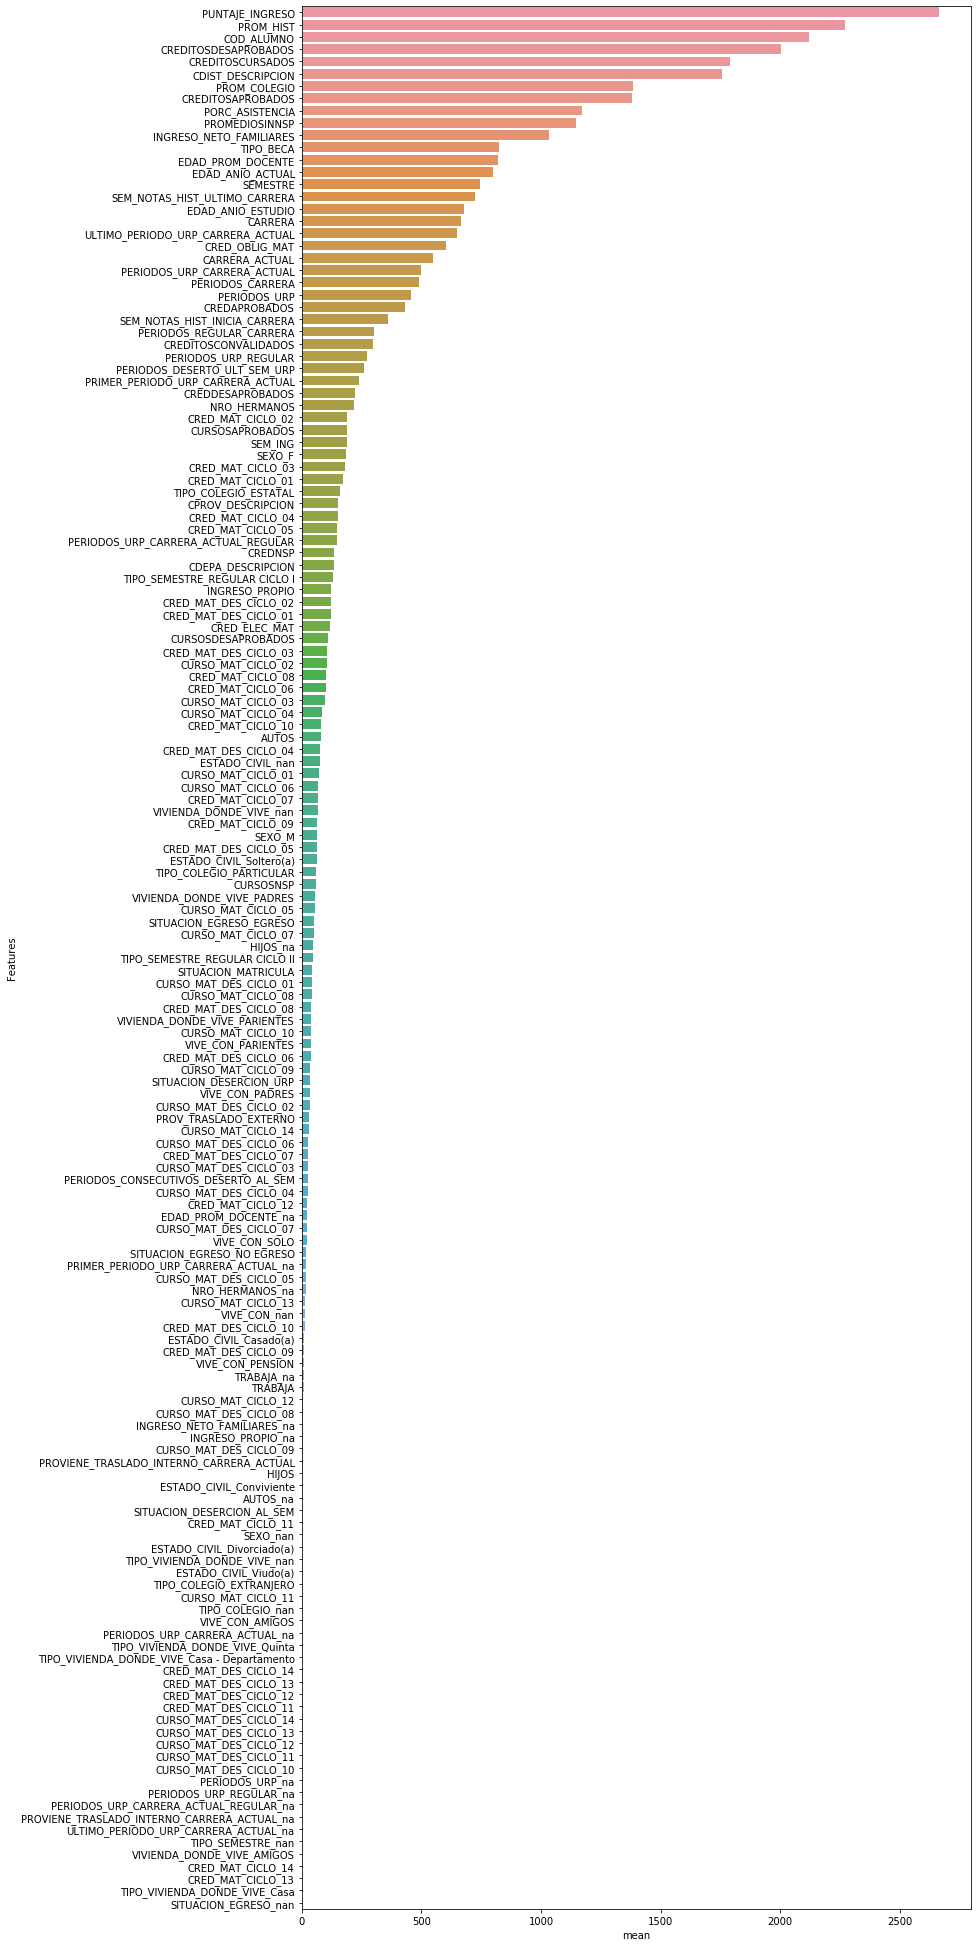

In [46]:
plt.figure(figsize=(12,35))
sns.barplot(x=importances['mean'],y=importances['Features'],order=importances.sort_values(by='mean',ascending=False)['Features'])

## Predictions and submission

In [47]:
submiss=pd.DataFrame()

In [48]:
submiss['COD_ALUMNO']=pd.read_csv('data_test.csv',encoding='ISO-8859-1')['COD_ALUMNO']

In [49]:
submiss['Morosidad']=model.predict(df_2,num_iterations=model.best_iteration)

In [50]:
submiss.head()

,COD_ALUMNO,Morosidad
0,URP000021,3.557685e-10
1,URP000022,3.060622e-10
2,URP000058,1.314955e-07
3,URP000059,9.249925e-08
4,URP000095,8.553881e-04


In [51]:
submiss['Morosidad']=submiss['Morosidad'].round(0).astype(int)

In [52]:
submiss.head()

,COD_ALUMNO,Morosidad
0,URP000021,0
1,URP000022,0
2,URP000058,0
3,URP000059,0
4,URP000095,0


In [53]:
#submiss.to_csv('onehot7lighgbm.csv',index=None,encoding='utf-8',sep=',')